In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
data = loadmat("/content/project4data1.mat")

In [3]:
print(type(data))

<class 'dict'>


In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
X = data["X"]
y = data["y"]
m = y.shape[0]

In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=uint8)

In [8]:
print(m)

5000


In [9]:
print(X.shape, y.shape)

(5000, 400) (5000, 1)


Text(0.5, 1.0, '[7]')

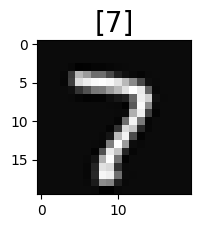

In [10]:
idx = 3671

plt.figure(figsize=(2, 2))

plt.imshow(np.reshape(X[idx], (20, 20)).T, cmap= "gray")
plt.title(str(y[idx]), fontsize = 20)

In [11]:
print("shape of X:", X.shape)
print("shape of X[idx]:", X[idx].shape)
print("shape of y:", y.shape)

shape of X: (5000, 400)
shape of X[idx]: (400,)
shape of y: (5000, 1)


In [12]:
X = np.transpose(X)
X.shape

(400, 5000)

In [13]:
y = np.transpose(y)
y.shape

(1, 5000)

In [14]:
X = np.concatenate([np.ones((1, m)), X], axis= 0)
X.shape

(401, 5000)

In [15]:
def sigmoid(x):
  g = 1 / (1 + np.exp(-x))
  return g

In [16]:
def computeCostWithReg(X, y, thetatemp, lambda_):
  m = X.shape[1]
  h = sigmoid(np.matmul(np.transpose(thetatemp), X))
  cost = (-1 / m) * (np.matmul(np.log(h), np.transpose(y)) + np.matmul(np.log(1 - h), np.transpose(1 - y)))
  costWithReg = cost + (lambda_ / (2 * m)) * np.matmul(np.transpose(thetatemp[1:]), thetatemp[1:])

  return costWithReg

In [17]:
theta = np.zeros((X.shape[0], 1))

cost = computeCostWithReg(X, y, theta, lambda_= 1)
print("initial cost is:", cost)

initial cost is: [[142.64968976]]


In [18]:
def gradientDescentWithReg(X, y, thetatemp, lr, epochs, lambda_):
  m = X.shape[1]
  J_history = []
  for epoch in range(epochs):
    thetatempreg = thetatemp.copy()
    thetatempreg[0] = 0
    h = sigmoid(np.matmul(np.transpose(thetatemp), X))
    temp = np.transpose(h - y)
    thetatemp = thetatemp - (lr / m) * (np.matmul(X, temp) + (lambda_) * thetatempreg)

    J_history.append(computeCostWithReg(X, y, thetatemp, lambda_)[0, 0])

  return thetatemp, J_history

In [19]:
theta = np.zeros((X.shape[0], 1))

epochs = 170
lr = 0.0000005

theta_new, J_history = gradientDescentWithReg(X, y, theta, lr, epochs, .1)

print("last cost: ", J_history[-1])

last cost:  143.30939941423125


In [20]:
def one_vs_all(X, y, num_classes, lr, num_epochs, lambda_,):
  n, m = X.shape
  all_theta = np.zeros((n, num_classes))
  for i in range(num_classes):
    y_temp = np.zeros(y.shape)
    y_temp[ y == i] = 1

    initial_theta = np.zeros((X.shape[0], 1))
    final_theta, J_hsitory = gradientDescentWithReg(X, y_temp, initial_theta, lr, num_epochs, lambda_)
    all_theta[:, i] = final_theta[:,0]

  return all_theta

In [21]:
all_theta = one_vs_all(X, y, 10, lr= 0.01, num_epochs= 50, lambda_= 0.1)

In [22]:
print(all_theta.shape)

(401, 10)


In [23]:
def predict_one_vs_all(all_theta, test_image):
  all_preds=[]
  for i in range(all_theta.shape[1]):
    pred = sigmoid(np.matmul(all_theta[:, i].T, test_image))
    all_preds.append(pred)

  return all_preds

In [24]:
all_preds = predict_one_vs_all(all_theta, X[:, 1025])
print(all_preds)

[0.2938407861387606, 0.22420205134079776, 0.25491101857543474, 0.23389374554256803, 0.21411865082403125, 0.25118207767683753, 0.2695544983535018, 0.21778076859648882, 0.23104483137883605, 0.22068418791152616]


In [25]:
digit = np.argmax(all_preds)
print(digit)

0


Text(0.5, 1.0, '2')

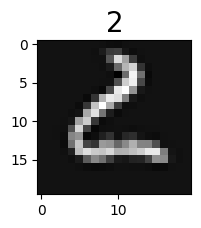

In [26]:
idx = 1025

plt.figure(figsize= (2,2))
plt.imshow(np.reshape(X[1:, idx], (20, 20)).T, cmap= "gray")
plt.title(str(y[0,idx]), fontsize = 20)